# Rice Type Classification

* SVM 연습에 초점

### 데이터 설명(출처: kaggle)

* id
* Area
* MajorAxisLength
* MinorAxisLength
* Eccentricity
* ConvexArea
* EquivDiameter
* Extent
* Perimeter
* Roundness
* AspectRation
* target - Class: Jasmine - 1, Gonen - 0.

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from IPython.display import Image

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

from sklearn.feature_extraction.text import CountVectorizer

## 데이터 불러오고 기본 정보 확인

In [2]:
# 데이터 불러오기
rice= pd.read_csv('C:/Users/82102/Desktop/riceClassification.csv')
rice

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [3]:
# 데이터 정보 확인
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


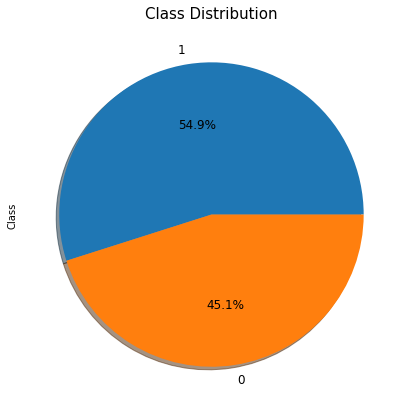

In [4]:
f, ax = plt.subplots(figsize=(7, 7))
rice['Class'].value_counts().plot.pie(shadow= True, ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

ax.set_title('Class Distribution', fontsize = 15);

* 대체적으로 균형

## EDA 및 시각화

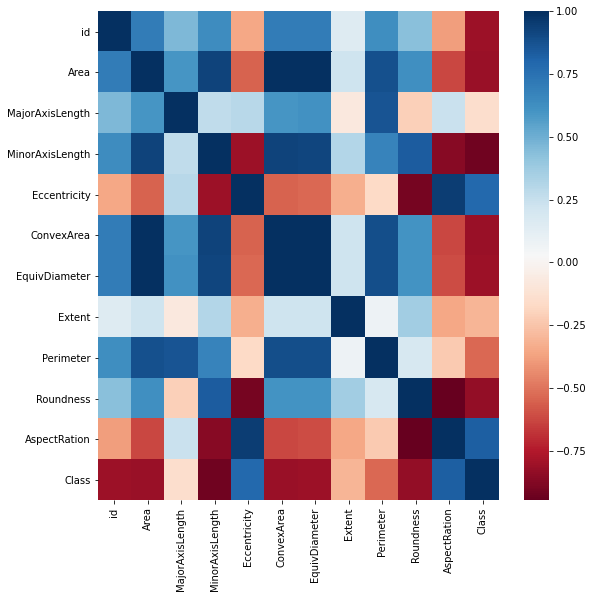

In [5]:
plt.figure(figsize=(9,9))
corr = rice.corr()
sns.heatmap(corr, cmap='RdBu')

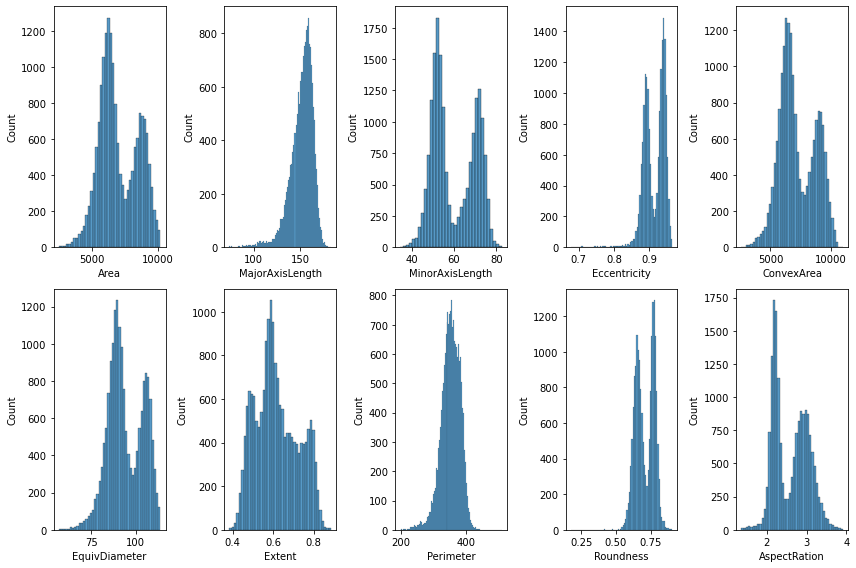

In [6]:
fig,axes = plt.subplots(nrows=2,ncols=5,figsize=(12,8))
sns.histplot(x="Area",data=rice,ax=axes[0,0])
sns.histplot(x="MajorAxisLength", data= rice, ax=axes[0,1])
sns.histplot(x="MinorAxisLength", data= rice, ax=axes[0,2])
sns.histplot(x="Eccentricity", data= rice, ax=axes[0,3])
sns.histplot(x="ConvexArea", data= rice, ax=axes[0,4])
sns.histplot(x="EquivDiameter", data= rice ,ax=axes[1,0])
sns.histplot(x="Extent", data= rice ,ax=axes[1,1])
sns.histplot(x="Perimeter", data= rice ,ax=axes[1,2])
sns.histplot(x="Roundness", data= rice ,ax=axes[1,3])
sns.histplot(x="AspectRation", data= rice,ax=axes[1,4])
plt.tight_layout()

## 모델링

In [7]:
# 타깃데이터 설정: Class
target = rice['Class']
data = rice.drop(['Class','id'],axis = 1, inplace=False)

* id는 분석에 불필요한 정보로 삭제

### 스케일링

* svm은 스케일링에 민감

In [8]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(data))
data_scaled = standardScaler.transform(data)

StandardScaler()


In [9]:
# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target, test_size= 0.3, random_state=156)

### SVM - linear

In [10]:
import sklearn.svm as svm
import sklearn.metrics as mt

svm_linear= svm.SVC(kernel='linear')

In [11]:
svm_linear.fit(X_train, y_train)
svm_ln_pred = svm_linear.predict(X_test)

In [12]:
svm_ln_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [13]:
print("Accuracy:",mt.accuracy_score(y_test, svm_ln_pred))
print("Precision:",mt.precision_score(y_test, svm_ln_pred))
print("Recall:",mt.recall_score(y_test, svm_ln_pred))
print("roc_auc",mt.roc_auc_score(y_test, svm_ln_pred))

Accuracy: 0.9899193548387096
Precision: 0.9867065470255899
Recall: 0.9949731903485255
roc_auc 0.9893959802875313


In [15]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(svm_linear, data_scaled, target, cv=5)
scores

array([0.65218587, 1.        , 1.        , 0.99780038, 0.94445972])

In [16]:
pd.DataFrame(cross_validate(svm_linear,data_scaled,target, cv=5))

,fit_time,score_time,test_score
0,0.226745,0.022863,0.652186
1,0.856701,0.111701,1.000000
2,0.778317,0.134634,1.000000
3,0.809513,0.106713,0.997800
4,0.252326,0.039893,0.944460


In [17]:
print('교차검증 평균:', scores.mean())

교차검증 평균: 0.9188891943909816


### SVM - 다항식

In [18]:
svm_poly = svm.SVC(kernel='poly') 

In [19]:
svm_poly.fit(X_train, y_train)
svm_poly_pred = svm_poly.predict(X_test)

In [20]:
svm_poly_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [21]:
print("Accuracy:",mt.accuracy_score(y_test, svm_poly_pred))
print("Precision:",mt.precision_score(y_test, svm_poly_pred))
print("Recall:",mt.recall_score(y_test, svm_poly_pred))
print("roc_auc",mt.roc_auc_score(y_test, svm_poly_pred))

Accuracy: 0.9847873900293255
Precision: 0.9751064526695054
Recall: 0.9976541554959786
roc_auc 0.9834549094631996


In [22]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_val_score(svm_poly, data_scaled, target, cv=5)
scores

array([0.78278801, 0.99972505, 0.99890019, 0.99615067, 0.89056915])

In [23]:
pd.DataFrame(cross_validate(svm_poly, data_scaled, target, cv=5))

,fit_time,score_time,test_score
0,0.630337,0.125665,0.782788
1,1.401554,0.274003,0.999725
2,1.298576,0.259305,0.998900
3,1.382304,0.264294,0.996151
4,0.644349,0.128582,0.890569


In [24]:
print('교차검증 평균:', scores.mean())

교차검증 평균: 0.9336266153423152


### SVM - rbf (가우시안)

In [25]:
svm_rbf = svm.SVC(kernel='rbf')

In [26]:
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_linear.predict(X_test)

In [27]:
print("Accuracy:",mt.accuracy_score(y_test, svm_rbf_pred))
print("Precision:",mt.precision_score(y_test, svm_rbf_pred))
print("Recall:",mt.recall_score(y_test, svm_rbf_pred))
print("roc_auc",mt.roc_auc_score(y_test, svm_rbf_pred))

Accuracy: 0.9899193548387096
Precision: 0.9867065470255899
Recall: 0.9949731903485255
roc_auc 0.9893959802875313


In [28]:
scores = cross_val_score(svm_rbf, data_scaled, target, cv=5)
scores

array([0.77728897, 0.99972505, 0.9994501 , 0.99807534, 0.90844102])

In [29]:
pd.DataFrame(cross_validate(svm_rbf, data_scaled, target, cv=5))

,fit_time,score_time,test_score
0,0.284144,0.101728,0.777289
1,1.062701,0.752134,0.999725
2,0.853716,0.275265,0.999450
3,0.672205,0.273266,0.998075
4,0.189572,0.112655,0.908441


In [30]:
print('교차검증 평균:', scores.mean())

교차검증 평균: 0.9365960956832555
